# TP noté n°2 : Introduction à la compression

Ce TP a pour objectif de donner une introduction pratique à certaines techniques élémentaires de compression. Il vous permettra également d'appréhender la création et la lecture d'images via python.

## Partie 1 : Présentation de la bibliothèque PIL

PIL (python image library) est une bibliothèque python permettant de manipuler des images. Si PIL n'est pas installée sur votre machine, vous pouvez entrer la commande suivante (dans un terminal par exemple) pour l'installer : 
```
pip install Pillow
```

La bibliothèque PIL contient notamment un module `Image` qui nous sera utile dans ce TP. On peut l'importer par :
```
from PIL import Image
```

Cette partie a pour but de vous faire manipuler quelques fonctions élémentaires de PIL afin que vous puissiez en comprendre le mécanisme. Pour plus de détails, un tutoriel assez complet est disponible à l'adresse suivante : https://pillow.readthedocs.io/en/stable/handbook/tutorial.html

Dans ce TP, nous allons manipuler des images en noir et blanc, sous la forme de grille de pixels. Pour définir une nouvelle image, on utilise la fonction `new` du module `Image`, en précisant le format de l'image et sa taille. Le format d'une image en noir et blanc est `"L"`, et sa taille doit êtrte donnée comme un couple d'entiers. Par exemple, pour initialiser une image de taille $(100 \times 100)$, on utilisera :
```
img = Image.new( 'L', (100, 100))
```
La variable `img` contiendra alors l'objet-image qui a été créé.

Ensuite, pour afficher l'image `img`, on peut entrer `display(img)` qui affichera l'image sous la cellule d'exécution. On peut également afficher l'image dans un logiciel multimédia grâce à `img.show()`.

**Question 1.** En n'oubliant pas d'importer le module `Image` de la bibliothèque `PIL`, initialiser dans une variable `img` une image de taille $(200 \times 40)$. Puis, afficher l'image à votre convenance.

In [2]:
from PIL import Image
#Définir l'image
img = Image.new('L',(400,20))

#Afficher l'Image
display(img)

Comme l'image donne un rectangle applati horizontalement, on déduit que le première dimension correspond à la largeur de l'image, et la seconde sa hauteur.

On observe également que, par défaut, les pixels de l'image sont noirs. Les pixels noirs sont représentés par la valeur entière `0`, tandis que les blanc par la valeur `255`. Les valeurs entre  $1$ et $254$ correspondent à des niveaux de gris que l'on n'utilisera pas dans ce TP.

Pour modifier la valeur d'un pixel d'une image `img`, on peut utiliser
```
img.putpixel((i,j), x)
```
où `(i,j)` désigne la position du pixel à modifier, et `x` la valeur à lui affecter.

**Question 2.** Modifier en blanc le pixel de coordonnées $(50, 10)$ de l'image précédemment créée. Puis, afficher l'image.

In [4]:
#MModifier en blanc le pixel de coordonnées (50,10)
img.putpixel((50,10),255)

#Afficher l'image modifée
display(img)

On observe que le pixel modifié (assez petit) se situe plutôt en haut à gauche de l'image. Cela signifie que les coordonnées $(0, 0)$ correspondent au pixel tout en haut à gauche.

La fonction `zoom` fournie dans la cellule suivante vous permet de créer une image "zoomée". Elle prend en entrée une image `image` et retourne une autre image en sortie. Elle ne modifie donc pas la variable `image`.

La fonction prend également en entrée un second argument, qui correspond au facteur de zoom. Par défauut, il est initialisé à $4$, mais on peut en choisir un autre.

In [5]:
from PIL import Image
def zoom(image, zoom_factor=4):
    im = image
    x, y = im.size
    im = im.resize([zoom_factor*x, zoom_factor*y], Image.NEAREST)
    return im

**Question 3.** Utiliser la fonction précédemment codée pour afficher deux versions zoomées de votre image :
1. l'une avec le facteur de zoom standard $4$ (donc, en ne donnant pas de second argument à la fonction)
2. l'autre avec un facteur de zoom $2$

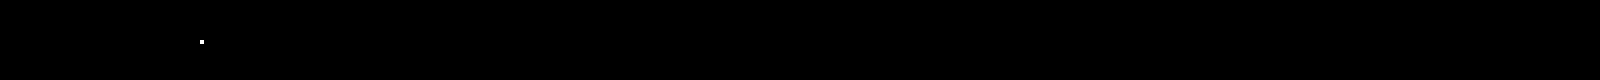

In [6]:
#Première version zoomée avec le facteur = 4
image1 = zoom(img)
display(image1)

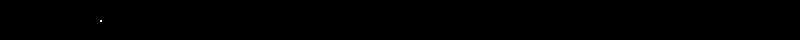

In [7]:
#Deuxième version zoomée avec le facteur = 2
image2 = zoom(img, zoom_factor=2)
display(image2)

En machine, une image en noir et blanc peut être représentée par une liste de bits : $0$ si le pixel est noir et $1$ s'il est blanc. Les deux fonction suivantes vous permettent de passer d'une image à une liste de bits, et réciproquement.

In [8]:
def img_to_bits(image):
    res = []
    for x in range(image.height):
        for y in range(image.width):
            if image.getpixel((y,x)) != 0:
                res.append(1)
            else:
                res.append(0)
    return res

def bits_to_img(bits, height, width):
    img = Image.new( 'L', (width, height), "black")
    for i in range(height):
        for j in range(width):
            if bits[i*width + j] == 1:
                img.putpixel((j,i), 255)
    return img

# bits_to_img(img_to_bits(zoom(img)), 100, 100)

**Question 4.** Créer la liste de bits `[0, 1, 1, 0, 1, 0, 0, 0]`, puis l'afficher sous la forme d'une image de hauteur $2$ et de largeur $4$.

*Remarque : comme l'image est très petite, on pourra utiliser un zoom avec un facteur important*

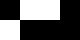

In [9]:
#Créer une liste de bits
bits = [0, 1, 1, 0, 1, 0, 0, 0]
 
#l'afficher sous la forme d'une image de hauteur 2 et de largeur 4
bit_image = bits_to_img(bits,2,4)

#On utilise un zoom avec une facteur de 20 par exemple
display(zoom(bit_image, zoom_factor=20))

Les trois fonctions suivantes vous permettent de créer des images avec des formes géométriques que l'on essaiera de compresser par la suite :
1. la fonction `diagonal(h)` crée une diagonale blanche sur un fond carré noir de coté `h`
2. la fonction `cross(h)` crée une croix noire sur un fond carré `blanc` de coté `h`
3. la fonction `square(h, r)` crée un carré noir de côté `r` au centre d'un fond blanc de côté `h`
   
**Attention !** Ces fonctions retournent une liste de bits, et non une image.

In [10]:
def diagonal(h):
    return [1 if i % (h+1) == 0 else 0 for i in range(h**2) ]

def cross(h):
    return [0 if (i % (h+1) == 0) or (i % (h-1) == 0) else 1 for i in range(h**2) ]

def square(h, r):
    res = []
    t = (h-r)//2
    for i in range(t):
        res += [1]*h
    for i in range(r):
        res += [1]*t + [0]*r + [1]*(h-t-r)
    for i in range(h-t-r):
        res += [1]*h
    return res


**Question 5.** Afficher des exemples d'images issues de ces trois fonctions.

Image issue de la fonction diagonal:


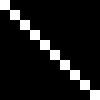

Image issue de la fonction cross:


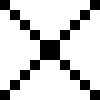

Image issue de la fonction square:


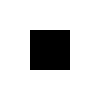

In [12]:
# Afficher un exemple d'image pour chaque fonction
h = 10
r = 4

# Image issue de la fonction diagonal
bits_diagonal = diagonal(h)
img_diagonal = bits_to_img(bits_diagonal, h, h)
print("Image issue de la fonction diagonal:")
display(zoom(img_diagonal, zoom_factor=10))

# Image issue de la fonction cross
bits_cross = cross(h)
img_cross = bits_to_img(bits_cross, h, h)
print("Image issue de la fonction cross:")
display(zoom(img_cross,zoom_factor=10))

# Image issue de la fonction square
bits_square = square(h, r)
img_square = bits_to_img(bits_square, h, h)
print("Image issue de la fonction square:")
display(zoom(img_square,zoom_factor=10))

## Partie 2 : Codage RLE brut

On rappelle que le codage par plage, aussi nommé RLE (*run-length encoding*), d'une suite de bits $(m_1, \dots, m_n)$ peut être défini de la sorte. On identifie d'abord le premier bit du message, puis on créer une liste d'entiers correspondant aux longueurs de plages, c'est-à-dire aux nombre de bits consécutivement égaux. Par exemple, pour le message $11000101100000001$, le premier bit est $1$, et la liste d'entiers est $(2, 3, 1, 1, 2, 7, 1)$. 

**Question 6.** Écrire une fonction `RLE(message)` qui prend en entrée un message binaire `message` et qui retourne un couple `(b, rle)` où
- `b` est le premier bit de `message`
- `rle` est une liste d'entiers décrivant les longueurs de plage

In [13]:
def RLE(message):
    # Initialiser le premier bit
    b = message[0]

    # Initialiser la liste d'entiers pour les longueurs de plage
    rle = []

    # Initialiser le compteur pour la longueur de la plage courante
    count = 1

    # Parcourir le reste du message
    for bit in message[1:]:
        # Si le bit est égal au bit précédent, incrémenter le compteur
        if bit == b:
            count += 1
        else:
            # Sinon, ajouter la longueur de la plage courante à la liste
            rle.append(count)
            # Mettre à jour le bit courant et réinitialiser le compteur
            b = bit
            count = 1

    # Ajouter la dernière longueur de plage à la liste
    rle.append(count)

    return message[0], rle

**Question 7.** Écrire la fonction `inverse_RLE(b, rle)` qui effectue le procédé inverse du codage RLE. Cette fonction doit don prendre en entrée un bit `b` et une liste d'entiers `rle`, et retourner la liste de bits `message` qui a servi pour obtenir le codage RLE `(b, rle)`.

In [14]:
def inverse_RLE(b, rle):
    message = [b]

    for element in rle:
        message.extend([b]*element)
        b = 1-b
        
    return message[1:]

**Question 8.** Tester vos deux fonctions précédentes (`RLE` et `inverse_RLE`), notamment avec l'exemple donné en début de partie 2.

In [15]:
#Tester les deux fonctions
message = [0,1,1, 1, 0, 0, 0, 1, 0, 1, 1, 0,0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
(b,rle) = RLE(message)
print(inverse_RLE(b, rle) == message)

True


**Question 9.** Quel est le code RLE de l'image diagonale de côté $20$ ?

In [16]:
#Le code RLE de l'image diagonale de coté 20
RLE(diagonal(20))

(1,
 [1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1,
  20,
  1])

## Partie 3 : Codage RLE avec un codage d'entiers

Si `(b, rle)` est la sortie d'un codage RLE, les entiers stockés dans la liste `rle` ne sont pas représentés par une suite de bits. On a vu lors du cours sur le codage de source qu'il y avait plusieurs méthodes pour encoder une suite d'entier sous forme binaire. Les fonctions suivantes permettent d'utiliser le codage "Gamma" dont la longueur moyenne est proche de la borne entropique pour de nombreuses distributions d'entiers. Pour plus de détails, voir la page wikipedia : https://fr.wikipedia.org/wiki/Codage_gamma

In [17]:
# Encodage unaire de l'entier n
def unaire(n):
    return [0]*n + [1]

# Décoomposition en base 2
def decomp(n):
    if n == 0:
        return [0]
    res = []
    while n != 0:
        res.append(n % 2)
        n >>= 1
    return res

# Recomposition en base 2
def inverse_decomp(d):
    res = 0
    p = 1
    for x in d:
        res += x*p
        p <<= 1
    return res

# Encodage gamma de l'entier n
def gamma(n):
    d = decomp(n)
    s = len(d)
    return unaire(s) + d

# Décodage gamma de l'entier codé c
def inverse_gamma(c):
    i = 0
    while c[i] == 0:
        i += 1
    d = c[i+1:]
    n = inverse_decomp(d)
    return n

# Encodage gamma d'une liste d'entiers L
def gamma_liste(L):
    res = []
    for n in L:
        res += gamma(n)
    return res
    
# Décodage gamma d'une liste d'entiers codés L
def inverse_gamma_liste(L):
    res = []
    N = len(L)
    i = 0
    s = 1
    while i < N:
        if L[i] == 0:
            i += 1
            s += 1
        else:
            n = inverse_decomp(L[i+1:i+1+s])
            res.append(n)
            i = i+s+1
            s = 1            
    return res

On souhaite représenter le codage RLE d'un message binaire comme une unique liste de bits. Pour cela, on va simplement concaténer le bit `b` du codage RLE  avec la représentation binaire de la suite d'entier `rle`. Cette représentation binaire peut être obtenue avec la fonction `gamma_liste` donnée ci-dessus.

Plus précisément, l'algorithme est le suivant. Pour un message `message` en entrée :
1. Calculer `(b, rle)` le codage RLE de `message`.
2. Notons $n_1, \dots, n_k$ les entiers présents dans la liste `rle`. Créer la liste `L` des codages gamma des entiers $[n_1 - 1, \dots, n_k-1]$.
3. Retourner la concaténation de `[b]` avec la liste `L`.

**Question 10.** Écrire une fonction `RLE_gamma(message)` qui retourne la représentation du codage RLE de `message` sous forme de liste de bits.

*Voici quelques valeurs de tests si besoin :*

message | encodage
:---: | :---:
`[0, 0, 0, 0]` | `[0, 0, 0, 1, 1, 1]`
`[1]*100` | `[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]` 
`[0, 1]*5` | `[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]` 
`diagonal(3)` | `[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]` 


In [18]:
#Définition de la fonction RLE_gamma
def RLE_gamma(message):
    message1 = message.copy()
    b, rle = RLE(message1)
    
    L_1 = [i-1 for i in rle]
    L = gamma_liste(L_1)

    return [b] + L
    

In [20]:
#tests
print(RLE_gamma([0,0,0,0]))
print(RLE_gamma([1]*100))
print(RLE_gamma([0, 1]*5))
print(RLE_gamma(diagonal(3)))

[0, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]


**Question 11.** Écrire `inverse_RLE_gamma(L)`, la fonction inverse de la fonction demandée à la question précédente.

In [21]:
#Définition de la fonction inverse

def inverse_RLE_gamma(L):
    #On fait une copie pour éviter la modification de nos données en entrée
    Lp = L.copy()
    #On suit la logique inverse
    b, L_1 = Lp[0], Lp[1:]
    L_2 = inverse_gamma_liste(L_1)
    rle = [i+1 for i in L_2]
    message = inverse_RLE(b,rle)

    return message

In [23]:
#Test de validité
M = [0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,1,0,0]
c = RLE_gamma(M)
M_d = inverse_RLE_gamma(c)
M_d == M

True

Dorénavant, comme l'encodage est représenté comme une liste de bits, la taille de l'encodage est la longueur de la liste. On appelle **facteur de compression** le ratio entre la taille du message encodé et la taille du message originel.

Une image carrée de côté $h$ a taille $h^2$. Si l'on considère le codage `RLE_gamma` des images complètement noires, les tailles et les facteurs de compression de ces images sont les suivants :

Coté $h$ | Taille de l'image originale | Taille de l'image compressée | Facteur de compression
 :---: | :---: | :---: | :---:
 10 | 100 | 16 | 0.16
 20 | 400 | 20 | 0.050
 50 | 2500 | 26 | 0.0104
 100 | 10000 | 30 | 0.0030
 1000 | 1000000 | 42 | 0.000042


**Question 12.** Calculer les facteurs de compression des images "diagonales", pour les mêmes valeurs de $h$ que le tableau précédent. Parmi ces valeurs de $h$, lesquelles donnent une "bonne" compression ?

In [24]:
h = [10, 20, 50, 100, 1000]
for hauteur in h:
    taille_originale = hauteur ** 2
    taile_compressee = len(RLE_gamma(diagonal(hauteur)))
    facteur = taile_compressee/taille_originale
    print("taille originale =", taille_originale, "taille compressée =", taile_compressee, "facteur =",facteur)

taille originale = 100 taille compressée = 112 facteur = 1.12
taille originale = 400 taille compressée = 270 facteur = 0.675
taille originale = 2500 taille compressée = 788 facteur = 0.3152
taille originale = 10000 taille compressée = 1786 facteur = 0.1786
taille originale = 1000000 taille compressée = 23980 facteur = 0.02398


In [25]:
#on remarque que pour h < 10, on obtient une taille compressée plus volumineuse que la taille originale, et à partir de h = 20, l'image compressée prend de moins en moins d'espace

La fonction suivante permet de créer un damier (succession de pixels blanc et noirs) de taille arbitraire

In [26]:
def damier(h):
    return [0 if (i+(i//h)) % 2 == 0 else 1 for i in range(h**2) ]

**Question 13.** Reprendre la question précédente avec des damier de taille $h$. La compression est-elle toujours bonne ? Interpréter.

In [28]:
h = [10, 20, 50, 100, 1000]
for hauteur in h:
    taille_originale = hauteur ** 2
    taile_compressee = len(RLE_gamma(damier(hauteur)))
    facteur = taile_compressee/taille_originale
    print("taille originale =", taille_originale, "taille compressée =", taile_compressee, "facteur =",facteur)

taille originale = 100 taille compressée = 274 facteur = 2.74
taille originale = 400 taille compressée = 1144 facteur = 2.86
taille originale = 2500 taille compressée = 7354 facteur = 2.9416
taille originale = 10000 taille compressée = 29704 facteur = 2.9704
taille originale = 1000000 taille compressée = 2997004 facteur = 2.997004


In [29]:
#d'après les résultats, la compression n'est pas du tout bonne.
#Une compression, d'après sa définition, doit réduire l'esapce ou la taille de l'image, ce qui est le contraire de ce qu'on obtient ; une croissance du facteur de compression.

## Partie 4 : transformée de Burrows-Wheeler

La transfomée de Burrows--Wheeler va nous permettre de régler le problème de la compressin du damier, apparu dans la partie précédente. On rappelle ci-dessous les différents algorithmes (vus en cours) pour opérer cette transformée.


#### Algorithme de rotation `rotate(L, i)`
- **Entrée :** une liste de bits $L$ de longueur $n$, et un entier `i` compris entre $0$ et $n-1$
- **Sortie :** la liste des éléments de `L`, permutée de manière cyclique de $i$ rangs vers la droite
1. Stocker dans `A` la liste des `i` derniers bits de `L`
2. Stocker dans `B` le reste de la liste `L`
3. Retourner la concaténation de `A` et de `B` (dans cet ordre)


#### Transformée de Burrows-Wheeler `BW(L)`
- **Entrée :** une liste de bits `L` de longueur $n$
- **Sortie :** un entier `pos` et une liste de bits `R`  de même longueur $n$
1. Stocker dans un tableau `Tab` la liste de toutes les rotations de `L`, en commençant par la rotation d'ordre $i = 0$, et en terminant par celle d'indice $i = n - 1$
2. Trier `Tab`
3. Retrouver l'indice de la liste `L` dans `Tab`, et le stocker dans `pos`
4. Stocker dans `R` la liste des derniers bits de toutes les listes de `Tab`
5. Retourner `pos` et `R`


#### Transformée inverse de Burrows-Wheeler
- **Entrée :** un entier `pos` et une liste de bits `L`  de même longueur $n$
- **Sortie :** une liste de bits `R` de longueur $n$
1. Initialiser un tableau `Tab` de $n$ listes vides
2. Itérer $n$ fois :
    1. Pour tout $i \in \{0, \dots, n-1 \}$ :
        - Ajouter l'élément `R[i]` au début de la liste `Tab[i]`
    2. Trier `Tab`
3. Retourner `Tab[pos]`

**Question 14.** Écrire la fonction de rotation `rotate(L, i)`.

In [30]:
def rotate(L, i):
    #Définir l'indice qui va nous permettre de stocker dans A la liste des i derniers bits de L
    n = len(L)
    i1 = n - i
    A = L[i1:]
    B = L[:i1]

    return A + B


**Question 15.** Écrire une fonction `BW(L)` qui retourne la transformée de Burrows-Wheeler de `L` sous la forme d'un couple `(pos, R)`, où `pos` est un entier et `R` une liste de bits.

*Indication : pour trier une liste `X`, on peut utiliser la méthode `X.sort()`*

In [31]:
def BW(L):
    #Stocker dans Tab la liste de toutes les rotations de L
    n = len(L)
    L1 = L.copy()
    Tab = [rotate(L1,i) for i in range(n)]
    #Trier Tab
    Tab.sort()
    #Trouver l'indice de L et le stocker dans pos
    pos = Tab.index(L)
    #Stocker dans R la liste des derniers bits de toutes les listes de Tab
    R = [Tab[i][n-1] for i in range(n)]

    return (pos,R)


**Question 16.** Écrire sa fonction inverse `inverse_BW(pos, L)`.

In [32]:
def inverse_BW(pos: int, L: list) -> list[int]:
    #Initialiser Tab
    n = len(L)
    Tab = [[] for _ in range(n)]

    #Itérer n fois
    for _ in range(n):
        for i in range(n):
            Tab[i].insert(0, L[i])
        Tab.sort() 
    return Tab[pos]

In [33]:
# Test de validité pour la fonction inverse
original_message = [1,1,0,1,0,1]
pos, R = BW(original_message)
reconstructed_message = inverse_BW(pos, R)

print("Message original:", original_message)
print("Message déchiffré:", reconstructed_message)
print("Message original = message déchiffré:", original_message == reconstructed_message)

Message original: [1, 1, 0, 1, 0, 1]
Message déchiffré: [1, 1, 0, 1, 0, 1]
Message original = message déchiffré: True


Pour encoder un message `message`, l'idée est maintenant d'appliquer le codage RLE sur la transformée de Burrows-Wheeler de `message`. Si l'on note `(pos, L)` la valeur de retour de cette transformée, l'encodage final sera donc la concaténation du code gamma de `pos` et du code `RLE_gamma` de la liste `bw`. 

**Question 17.** Écrire les fonctions `BW_RLE(message)` et `inverse_BW_RLE(L)` qui effectuent respectivement cet "encodage final" et le décodage associé.

In [34]:
def BW_RLE(message):
    pos, L = BW(message)
    A = gamma(pos)
    B = RLE_gamma(L)
    return A + B

def inverse_BW_RLE(R):
    
    n = len(R)
    for i in range(n):
        if gamma(i) == R[:len(gamma(i))] :
            pos = i
            break
    A = gamma(pos)
    B = R[len(A):]
    L = inverse_RLE_gamma(B)
    message = inverse_BW(pos, L)

    return message

**Question 18.** Tester les fonctions de la question précédente, puis, calculer les facteurs de compression des damiers (on prendra des valeurs de $h$ beaucoup plus petites pour des raisons de temps de calcul : $h \in \{ 10, 20, 30, 40, 50 \}$ par exemple). 

In [35]:
#Tester la validité des deux fonctions
M1, M2, M3 = [0,0,1,0,1,0,1,0,1], [1,0,1,0,0,1], [1,0,1,1,1,0,0,1]
C1, C2, C3 = BW_RLE(M1), BW_RLE(M2), BW_RLE(M3)
M1_dec, M2_dec, M3_dec = inverse_BW_RLE(C1), inverse_BW_RLE(C2), inverse_BW_RLE(C3)
(M1_dec == M1) & (M2_dec == M2) & (M3_dec == M3)

True

In [36]:
#Calculer les facteurs de compression
h = [10, 20, 30, 40, 50]
for hauteur in h:
    taille_originale = hauteur ** 2
    taile_compressee = len(BW_RLE(damier(hauteur)))
    facteur = taile_compressee/taille_originale
    print("taille originale =", taille_originale, "taille compressée =", taile_compressee, "facteur =",facteur)

taille originale = 100 taille compressée = 70 facteur = 0.7
taille originale = 400 taille compressée = 94 facteur = 0.235
taille originale = 900 taille compressée = 104 facteur = 0.11555555555555555
taille originale = 1600 taille compressée = 118 facteur = 0.07375
taille originale = 2500 taille compressée = 128 facteur = 0.0512


In [37]:
#On voit clairement que la compression est assez efficace